In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.preprocessing import LabelEncoder

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('Student_Performance.csv')

In [6]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
df.shape

(10000, 6)

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [11]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

<Axes: xlabel='Performance Index'>

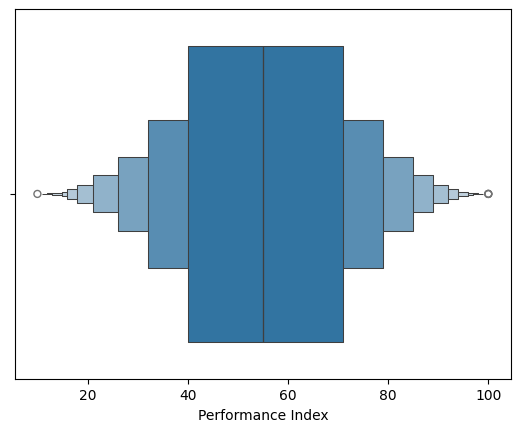

In [13]:
sns.boxenplot(x=df['Performance Index'])

<Axes: xlabel='Sleep Hours'>

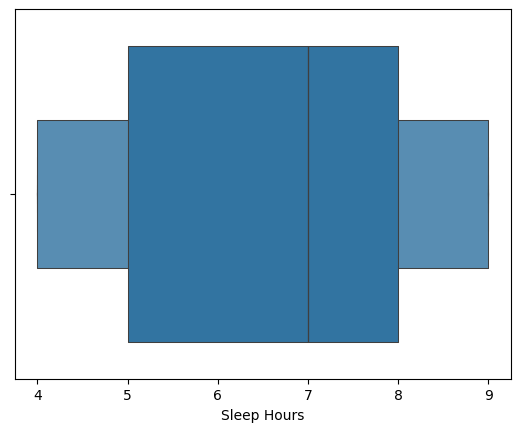

In [14]:
sns.boxenplot(x=df['Sleep Hours'])

In [23]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8 

In [24]:
df.count()

Hours Studied                       10000
Previous Scores                     10000
Extracurricular Activities          10000
Sleep Hours                         10000
Sample Question Papers Practiced    10000
Performance Index                   10000
dtype: int64

In [27]:
df.head()

,Hours,Previous_Scores,Activities,Sleep,Sample_papers,PI
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [26]:
df=df.rename(columns={'Hours Studied':'Hours','Previous Scores':'Previous_Scores','Extracurricular Activities':'Activities','Sleep Hours':'Sleep','Sample Question Papers Practiced':'Sample_papers','Performance Index':'PI'})

In [28]:
df=df.drop_duplicates()

In [29]:
df.count()

Hours              9873
Previous_Scores    9873
Activities         9873
Sleep              9873
Sample_papers      9873
PI                 9873
dtype: int64

In [31]:
le=LabelEncoder()
df.Activities=le.fit_transform(df.Activities)

In [32]:
df.head()

,Hours,Previous_Scores,Activities,Sleep,Sample_papers,PI
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


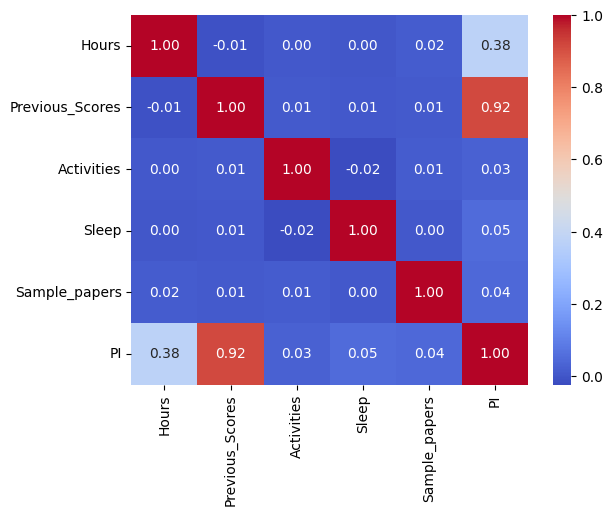

In [ ]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt=".2f")
plt.show()

In [38]:
x = df['Previous_Scores']
y = df['PI']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr=LinearRegression()

In [43]:
lr.fit(x_train.values.reshape(-1,1),y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred=lr.predict(x_test.values.reshape(-1,1))

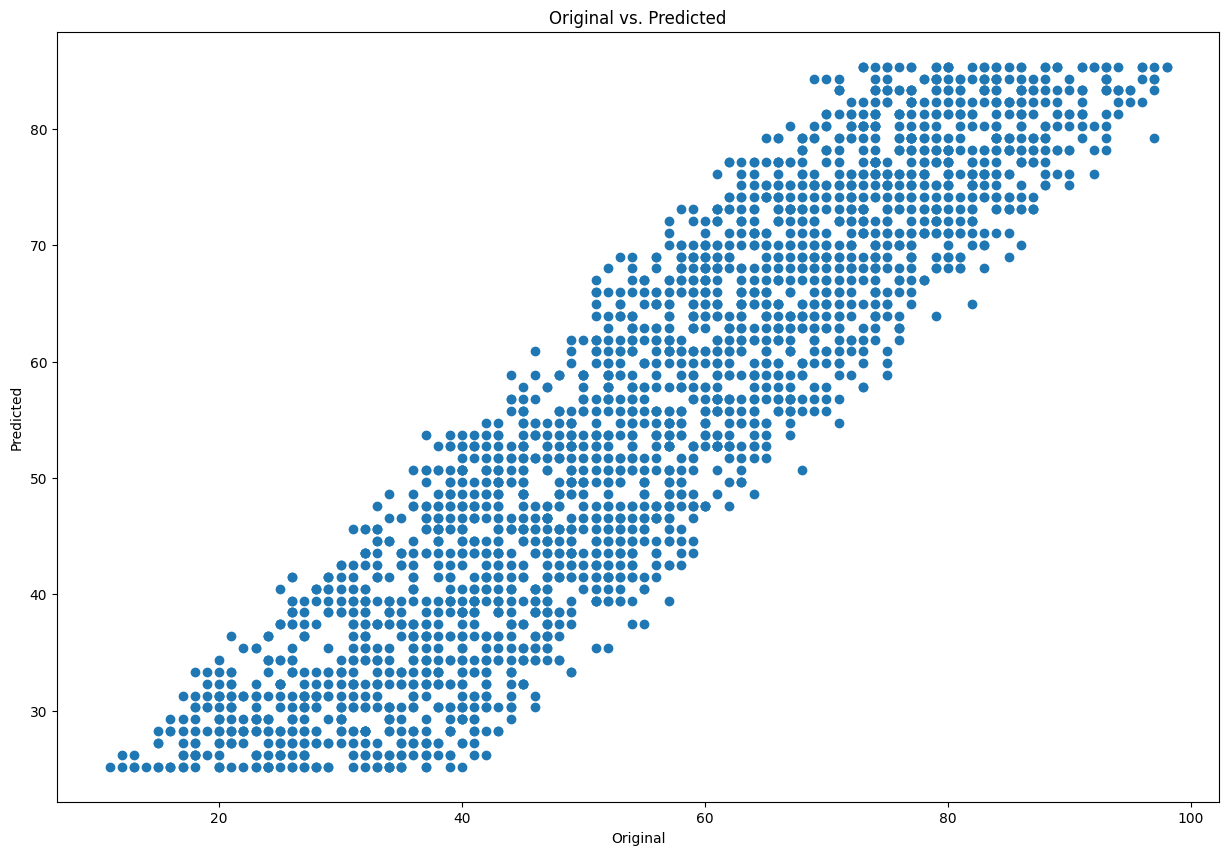

In [46]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Original vs. Predicted')
plt.show()